In [1]:
import networkx as nx
import pprint as pp
import matplotlib.pyplot as plt
import math

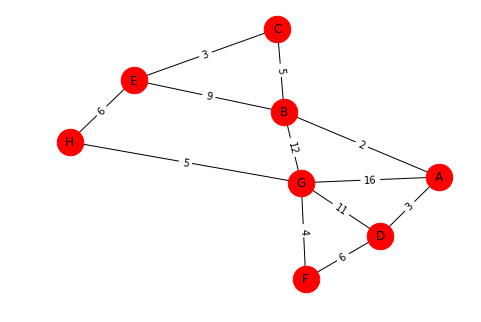

In [2]:
G = nx.Graph()
node_list = ['A', 'B', 'C', 'D', 'F', 'G', 'H']
G.add_nodes_from(node_list)

G.add_edge('A', 'B', weight=2)
G.add_edge('A', 'G', weight=16)
G.add_edge('A', 'D', weight=3)
G.add_edge('B', 'C', weight=5)
G.add_edge('B', 'G', weight=12)
G.add_edge('B', 'E', weight=9)
G.add_edge('C', 'E', weight=3)
G.add_edge('D', 'F', weight=6)
G.add_edge('D', 'G', weight=11)
G.add_edge('E', 'H', weight=6)
G.add_edge('F', 'G', weight=4)
G.add_edge('G', 'H', weight=5)


pos = nx.spring_layout(G)
nx.draw(G, pos,  with_labels = True, node_size=700)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

```

initial setup: 

Q  = [A, B, C, D, E, F, G, H]

      A    B    C    D    E    F    G    H

dist  0    inf  inf  inf  inf  inf  inf  inf

prev  none none none none none none none none

Q  = [A, B, C, D, E, F, G, H]

iteration 1 - pick A with min = 0

      A    B    C    D    E    F    G    H

dist  0    2    inf  3    inf  inf  16   inf

prev  none A    none A    none none A    none

Q  = [B, C, D, E, F, G, H]

iteration 2 - pick B with min = 2

      A    B    C    D    E    F    G    H

dist  0    2    7    3    11  inf   14   inf

prev  none A    B    A    B   none  B    none

Q  = [C, D, E, F, G, H]

iteration 3 - pick D with min = 3

      A    B    C    D    E    F    G    H

dist  0    2    7    3    11   9    14   inf

prev  none A    B    A    B    D    B    none

Q  = [C, E, F, G, H]

iteration 4 - pick C with min = 7

      A    B    C    D    E    F    G    H

dist  0    2    7    3    10   9    14   inf

prev  none A    B    A    C    D    B    none

Q  = [E, F, G, H]

iteration 5 - pick F with min = 9

      A    B    C    D    E    F    G    H

dist  0    2    7    3    10   9    13   inf

prev  none A    B    A    C    D    F    none

Q  = [E, G, H]

iteration 6 - pick E with min = 10

      A    B    C    D    E    F    G    H

dist  0    2    7    3    10   9    13   16

prev  none A    B    A    C    D    F    E

Q  = [G, H]

iteration 7 - pick G with min = 13

      A    B    C    D    E    F    G    H

dist  0    2    7    3    10   9    13   16

prev  none A    B    A    C    D    F    E

Q  = [H]

iteration 6 - pick H with min = 16

      A    B    C    D    E    F    G    H

dist  0    2    7    3    10   9    13   16

prev  none A    B    A    C    D    F    E

; terminate

path : H -> E -> C -> B -> A
length : 16

```

In [3]:
# verification of problem 1 

length, path = nx.single_source_dijkstra(G, 'A', 'H')
print("length: ")
print(length)
print("path: ")
print(path)

length: 
16
path: 
['A', 'B', 'C', 'E', 'H']


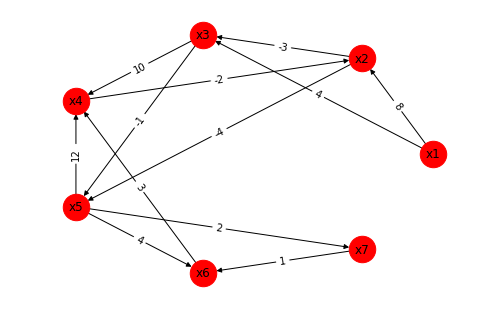

In [4]:
G = nx.DiGraph()
node_list = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
G.add_nodes_from(node_list)
G.add_edge('x1', 'x2', weight=8)
G.add_edge('x1', 'x3', weight=4)
G.add_edge('x2', 'x3', weight=-3)
G.add_edge('x3', 'x4', weight=10)
G.add_edge('x4', 'x2', weight=-2)
G.add_edge('x2', 'x5', weight=-4)
G.add_edge('x3', 'x5', weight=-1)
G.add_edge('x5', 'x4', weight=12)
G.add_edge('x6', 'x4', weight=3)
G.add_edge('x5', 'x6', weight=4)
G.add_edge('x7', 'x6', weight=1)
G.add_edge('x5', 'x7', weight=2)

pos = nx.shell_layout(G)
nx.draw(G, pos,  with_labels = True, node_size=700)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

```

initial setup: 

      x1   x2   x3   x4   x5   x6   x7

dist  0    inf  inf  inf  inf  inf  inf 

prev  none none none none none none none

i = 1
      x1   x2   x3   x4   x5   x6   x7

dist  0    8    4    9    3    6    5

prev  none x1   x1   x6   x3   x7   x5

; first relaxation

i = 2
      x1   x2   x3   x4   x5   x6   x7

dist  0    7    4    9    3    6    5

prev  none x4   x1   x6   x3   x7   x5

; relax (x4, x2)

i = 3
      x1   x2   x3   x4   x5   x6   x7

dist  0    7    4    9    3    6    5

prev  none x4   x1   x6   x3   x7   x5

; no changes 
; terminate
```

In [5]:
# verification for problem 2 pt 2.

length, path = nx.single_source_bellman_ford(G, 'x1')
print("dist:")
pp.pprint(length)
print("paths")
pp.pprint(path)

dist:
{'x1': 0, 'x2': 7, 'x3': 4, 'x4': 9, 'x5': 3, 'x6': 6, 'x7': 5}
paths
{'x1': ['x1'],
 'x2': ['x1', 'x3', 'x5', 'x7', 'x6', 'x4', 'x2'],
 'x3': ['x1', 'x3'],
 'x4': ['x1', 'x3', 'x5', 'x7', 'x6', 'x4'],
 'x5': ['x1', 'x3', 'x5'],
 'x6': ['x1', 'x3', 'x5', 'x7', 'x6'],
 'x7': ['x1', 'x3', 'x5', 'x7']}


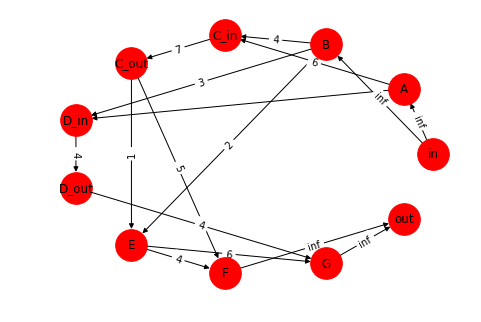

In [6]:
G = nx.DiGraph()
node_list = ['in', 'A', 'B','C_in', 'C_out', 'D_in', 'D_out', 'E', 'F', 'G', 'out']
G.add_nodes_from(node_list)
G.add_edge('in', 'A', capacity=math.inf)
G.add_edge('in', 'B', capacity=math.inf)
G.add_edge('C_in', 'C_out', capacity=7)
G.add_edge('D_in', 'D_out', capacity=4)
G.add_edge('A', 'C_in', capacity=6)
G.add_edge('A', 'D_in', capacityt=5)
G.add_edge('B', 'C_in', capacity=4)
G.add_edge('B', 'E', capacity=2)
G.add_edge('B', 'D_in', capacity=3)
G.add_edge('C_out', 'F', capacity=5)
G.add_edge('D_out', 'G', capacity=4)
G.add_edge('C_out', 'E', capacity=1)
G.add_edge('E', 'F', capacity=4)
G.add_edge('E', 'G', capacity=6)
G.add_edge('F', 'out', capacity=math.inf)
G.add_edge('G', 'out', capacity=math.inf)


pos = nx.shell_layout(G)
nx.draw(G, pos,  with_labels = True, node_size=1000)
labels = nx.get_edge_attributes(G,'capacity')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

``` 

; init all flow to zero

; init residual table 

c_f    in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   inf inf 0   0   0   0   0   0   0   0
A      0   0   0   6   0   5   0   0   0   0   0
B      0   0   0   4   0   3   0   2   0   0   0
C_i    0   0   0   0   7   0   0   0   0   0   0
C_o    0   0   0   0   0   0   0   1   5   0   0
D_i    0   0   0   0   0   0   4   0   0   0   0
D_o    0   0   0   0   0   0   0   0   0   4   0
E      0   0   0   0   0   0   0   0   4   6   0
F      0   0   0   0   0   0   0   0   0   0   inf
G      0   0   0   0   0   0   0   0   0   0   inf 
out    0   0   0   0   0   0   0   0   0   0   0

iteration 1 

augmenting path:
p[1] : in -> A -> C(in) -> C(out) -> F -> out

c_f(p[1]) = min { c_f(in, A), c_f(A, C(in)), c_f(c(in, c(out)), c_f(C(out), F), c_f(F, out) }
          = min { inf, 6, 7, 5, inf } 
          = 5 
          
; update flow graph 

f      in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   5   0   0   0   0   0   0   0   0   0
A      -5  0   0   5   0   0   0   0   0   0   0
B      0   0   0   0   0   0   0   0   0   0   0
C_i    0   -5  0   0   5   0   0   0   0   0   0
C_o    0   0   0   -5  0   0   0   0   5   0   0
D_i    0   0   0   0   0   0   0   0   0   0   0
D_o    0   0   0   0   0   0   0   0   0   0   0
E      0   0   0   0   0   0   0   0   0   0   0
F      0   0   0   0  -5   0   0   0   0   0   5
G      0   0   0   0   0   0   0   0   0   0   0 
out    0   0   0   0   0   0   0   0   -5  0   0

; update residual graph 

c_f    in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   inf inf 0   0   0   0   0   0   0   0
A      5   0   0   1   0   5   0   0   0   0   0
B      0   0   0   4   0   3   0   2   0   0   0
C_i    0   5   0   0   2   0   0   0   0   0   0
C_o    0   0   0   5   0   0   0   1   0   0   0
D_i    0   0   0   0   0   0   4   0   0   0   0
D_o    0   0   0   0   0   0   0   0   0   4   0
E      0   0   0   0   0   0   0   0   4   6   0
F      0   0   0   0   5   0   0   0   0   0   inf
G      0   0   0   0   0   0   0   0   0   0   inf 
out    0   0   0   0   0   0   0   0   5   0   0

iteration 2 

augmenting path:
p[2] : in -> A -> C(in) -> C(out) -> E -> G -> out

c_f(p[2]) = min { c_f(in, A), c_f(A, C(in)), c_f(C(in), C(out)), c_f(C(out), E), c_f(E, G), c_f(G, out) }
          = min { inf, 1, 2, 1, 6, inf } 
          = 1
          
; update flow graph 

f      in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   6   0   0   0   0   0   0   0   0   0
A      -6  0   0   6   0   0   0   0   0   0   0
B      0   0   0   0   0   0   0   0   0   0   0
C_i    0   -6  0   0   6   0   0   0   0   0   0
C_o    0   0   0   -6  0   0   0   1   5   0   0
D_i    0   0   0   0   0   0   0   0   0   0   0
D_o    0   0   0   0   0   0   0   0   0   0   0
E      0   0   0   0  -1   0   0   0   0   1   0
F      0   0   0   0  -5   0   0   0   0   0   5
G      0   0   0   0   0   0   0   0   0   0   1 
out    0   0   0   0   0   0   0  -1   -5 -1   0

; update residual graph 
c_f    in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   inf inf 0   0   0   0   0   0   0   0
A      6   0   0   0   0   5   0   0   0   0   0
B      0   0   0   4   0   3   0   2   0   0   0
C_i    0   6   0   0   1   0   0   0   0   0   0
C_o    0   0   0   6   0   0   0   0   0   0   0
D_i    0   0   0   0   0   0   4   0   0   0   0
D_o    0   0   0   0   0   0   0   0   0   4   0
E      0   0   0   0   1   0   0   0   4   5   0
F      0   0   0   0   5   0   0   0   0   0   inf
G      0   0   0   0   0   0   0   0   0   0   inf 
out    0   0   0   0   0   0   0   1   5   0   0

iteration 3 

p[3] : in -> A -> D(in) -> D(out) -> G -> out 

c_f(p[3]) = min { c_f(in, A), c_f(A, D(in)), c_f(D(in), D(out)), c_f(D(out), G), c_f(G, out) }
          = min { inf, 5, 4, 4, inf } 
          = 4 
          
; update flow graph 

f      in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   10  0   0   0   0   0   0   0   0   0
A      -10 0   0   6   0   4   0   0   0   0   0
B      0   0   0   0   0   0   0   0   0   0   0
C_i    0   -6  0   0   6   0   0   0   0   0   0
C_o    0   0   0   -6  0   0   0   1   5   0   0
D_i    0   -4  0   0   0   0   4   0   0   0   0
D_o    0   0   0   0   0   -4  0   0   0   4   0
E      0   0   0   0  -1   0   0   0   0   1   0
F      0   0   0   0  -5   0   0   0   0   0   5
G      0   0   0   0   0   0   -4  -1  0   0   5 
out    0   0   0   0   0   0   -1  0   -5  0   0

; update residual graph 

c_f    in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   inf inf 0   0   0   0   0   0   0   0
A      10  0   0   0   0   1   0   0   0   0   0
B      0   0   0   4   0   3   0   2   0   0   0
C_i    0   6   0   0   1   0   0   0   0   0   0
C_o    0   0   0   6   0   0   0   0   0   0   0
D_i    0   4   0   0   0   0   0   0   0   0   0
D_o    0   0   0   0   0   4   0   0   0   0   0
E      0   0   0   0   1   0   0   0   4   5   0
F      0   0   0   0   5   0   0   0   0   0   inf
G      0   0   0   0   0   0   4   1   0   0   inf 
out    0   0   0   0   0   0   1   0   5   0   0

iteration 4 

p[4] : in -> B -> E -> out 
c_f(p[4]) = min { c_f(in, B), c_f(B, E), c_f(E, G), c_f(G, out) }
          = min { inf, 2, 5, 4, inf } 
          = 2

; update flow graph 

f      in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   10  2   0   0   0   0   0   0   0   0
A      -10 0   0   6   0   4   0   0   0   0   0
B      -2   0  0   0   0   0   0   2   0   0   0
C_i    0   -6  0   0   6   0   0   0   0   0   0
C_o    0   0   0   -6  0   0   0   1   5   0   0
D_i    0   -4  0   0   0   0   4   0   0   0   0
D_o    0   0   0   0   0   -4  0   0   0   4   0
E      0   0  -2   0  -1   0   0   0   0   3   0
F      0   0   0   0  -5   0   0   0   0   0   5
G      0   0   0   0   0   0   -4  3   0   0   5 
out    0   0   0   0   0   0   -1  0   -5 -5   0

; update residual graph 

c_f    in  A   B   C_i C_o D_i D_o E   F   G   out 
in     0   inf inf 0   0   0   0   0   0   0   0
A      10  0   0   0   0   1   0   0   0   0   0
B      2   0   0   4   0   3   0   0   0   0   0
C_i    0   6   0   0   1   0   0   0   0   0   0
C_o    0   0   0   6   0   0   0   0   0   0   0
D_i    0   4   0   0   0   0   0   0   0   0   0
D_o    0   0   0   0   0   4   0   0   0   0   0
E      0   0   2   0   1   0   0   0   4   3   0
F      0   0   0   0   5   0   0   0   0   0   inf
G      0   0   0   0   0   0   4   0   0   0   inf 
out    0   0   0   0   0   0   1   0   5   5   0

; only E has flow to F, G (the sink nodes) in the residual graph
; no node has flow to E, therefore we can't get any more flow 

the max flow is sum of the [in] row of the flow graph, therefore 

max flow = 12 
```

In [7]:
# networkx only has Edmond-Karps available, although it uses BFS for path finding instead of DFS
# it should return the maximum flow, we ignore the path matrix as it varies even 
# between two iterations of Ford-Fulkerson

max_flow, _ = nx.maximum_flow(G, 'in', 'out', flow_func=nx.algorithms.flow.maxflow.edmonds_karp)
print("max flow : {}".format(max_flow))

max flow : 12
